In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
x = np.linspace(0, 50, 501)
y = np.sin(x)

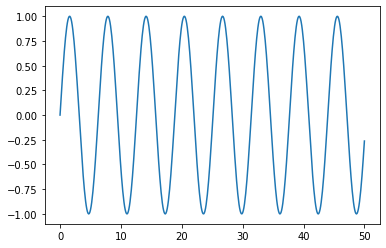

In [44]:
plt.plot(x, y)

In [45]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [46]:
test_size = round(len(df) * 0.1)
split_index = len(df) - test_size
split_index

451

In [47]:
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

In [48]:
train_df.tail()

,Sine
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208
45.0,0.850904


In [49]:
test_df.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [50]:
train_df.shape

(451, 1)

In [51]:
test_df.shape

(50, 1)

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train = scaler.transform(train_df)
test = scaler.transform(test_df)

In [53]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 2
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)

In [54]:
len(generator)

449

In [55]:
X, y = generator[0]

In [56]:
X.flatten()

array([0.49999912, 0.54991622])

In [57]:
y

array([[0.59933458]])

In [58]:
length = 10
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)

In [59]:
X, y = generator[0]

In [60]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571]]])

In [61]:
y

array([[0.92073798]])

In [62]:
length = 50
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [64]:
n_features = 1

In [65]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(generator, epochs=15)

  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/15
401/401 [==============================] - 25s 61ms/step - loss: 0.0037
Epoch 2/15
401/401 [==============================] - 23s 58ms/step - loss: 1.3951e-04
Epoch 3/15
401/401 [==============================] - 22s 54ms/step - loss: 1.7576e-04
Epoch 4/15
401/401 [==============================] - 22s 54ms/step - loss: 1.0293e-04
Epoch 5/15
401/401 [==============================] - 21s 52ms/step - loss: 7.3088e-05
Epoch 6/15
401/401 [==============================] - 21s 53ms/step - loss: 1.0063e-04
Epoch 7/15
401/401 [==============================] - 21s 53ms/step - loss: 4.8842e-05
Epoch 8/15
401/401 [==============================] - 21s 53ms/step - loss: 4.4041e-04
Epoch 9/15
401/401 [==============================] - 21s 53ms/step - loss: 8.0154e-06
Epoch 10/15
401/401 [==============================] - 21s 52ms/step - loss: 3.9819e-06
Epoch 11/15
401/401 [==============================] - 25s 61ms/step - loss: 2.4671e-05


In [68]:
first_eval_batch = train[-length:]
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [69]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

model.predict(first_eval_batch)

array([[0.9437161]], dtype=float32)

In [70]:
test[0]

array([0.94955134])

In [71]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [72]:
current_batch.shape

(1, 50, 1)

In [73]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [74]:
np.append(current_batch[:, 1:, :], [[[99]]], axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [75]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [76]:
test_predictions

[array([0.9437161], dtype=float32),
 array([0.9590639], dtype=float32),
 array([0.9682468], dtype=float32),
 array([0.97302705], dtype=float32),
 array([0.97165173], dtype=float32),
 array([0.9651663], dtype=float32),
 array([0.95364314], dtype=float32),
 array([0.9375533], dtype=float32),
 array([0.91638464], dtype=float32),
 array([0.8908453], dtype=float32),
 array([0.8613901], dtype=float32),
 array([0.82822746], dtype=float32),
 array([0.79209197], dtype=float32),
 array([0.7527354], dtype=float32),
 array([0.71067643], dtype=float32),
 array([0.6664708], dtype=float32),
 array([0.6199794], dtype=float32),
 array([0.5720012], dtype=float32),
 array([0.5227958], dtype=float32),
 array([0.4726307], dtype=float32),
 array([0.4218036], dtype=float32),
 array([0.3710356], dtype=float32),
 array([0.32054338], dtype=float32),
 array([0.27131972], dtype=float32),
 array([0.22296688], dtype=float32),
 array([0.17676777], dtype=float32),
 array([0.13270846], dtype=float32),
 array([0.091639

In [77]:
test_pred = scaler.inverse_transform(test_predictions)

In [78]:
test_pred

array([[ 0.88742686],
       [ 0.91812218],
       [ 0.93648789],
       [ 0.94604828],
       [ 0.94329766],
       [ 0.93032684],
       [ 0.90728077],
       [ 0.87510132],
       [ 0.83276436],
       [ 0.78168609],
       [ 0.7227762 ],
       [ 0.65645142],
       [ 0.58418101],
       [ 0.50546846],
       [ 0.42135125],
       [ 0.33294075],
       [ 0.23995861],
       [ 0.14400305],
       [ 0.045593  ],
       [-0.05473637],
       [-0.15638979],
       [-0.25792495],
       [-0.35890859],
       [-0.45735513],
       [-0.55406003],
       [-0.64645751],
       [-0.73457542],
       [-0.81671327],
       [-0.89235065],
       [-0.96059008],
       [-1.02070694],
       [-1.07124311],
       [-1.11255247],
       [-1.14363361],
       [-1.1643529 ],
       [-1.17446844],
       [-1.17381795],
       [-1.16253424],
       [-1.14083359],
       [-1.10875812],
       [-1.06693405],
       [-1.01556808],
       [-0.95519806],
       [-0.88677241],
       [-0.81074613],
       [-0

In [79]:
test_df['pred'] = test_pred

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
test_df

,Sine,pred
45.1,0.899097,0.887427
45.2,0.938307,0.918122
45.3,0.968142,0.936488
45.4,0.988304,0.946048
45.5,0.998591,0.943298
45.6,0.998900,0.930327
45.7,0.989229,0.907281
45.8,0.969673,0.875101
45.9,0.940429,0.832764
46.0,0.901788,0.781686


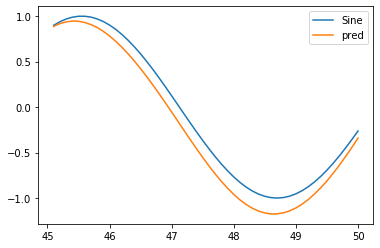

In [81]:
test_df.plot()

In [82]:
model_1 = Sequential()
model_1.add(LSTM(50, input_shape=(length, n_features)))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')

In [ ]:
model_1.fit(generator, epochs=20)

  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/20
401/401 [==============================] - 24s 61ms/step - loss: 0.0183
Epoch 2/20
261/401 [==================>...........] - ETA: 7s - loss: 3.0084e-04